# Fire up pandas create

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load some house value vs. crime rate data

Dataset is from Philadelphia, PA and includes average house sales price in a number of neighborhoods.  The attributes of each neighborhood we have include the crime rate ('CrimeRate'), miles from Center City ('MilesPhila'), town name ('Name'), and county name ('County').

In [2]:
sales = pd.read_csv('Philadelphia_Crime_Rate_noNA.csv')

In [3]:
sales.head()

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
0,140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
1,113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
2,124186,12.4186,19.5,25.0,8.0,Aston,Delaware
3,110490,11.0490,49.4,25.0,2.7,Bensalem,Bucks
4,79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks


# Exploring the data 

The house price in a town is correlated with the crime rate of that town. Low crime towns tend to be associated with higher house prices and vice versa.

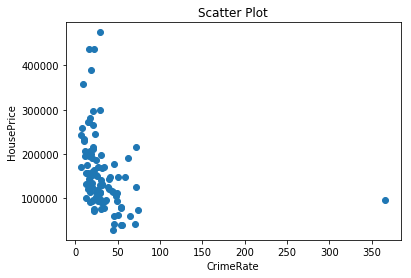

In [4]:
plt.scatter(x=sales['CrimeRate'],y=sales['HousePrice'])
plt.title("Scatter Plot")
plt.ylabel('HousePrice')
plt.xlabel('CrimeRate')
plt.show()

# Create a Regression Model

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
crime_model = LinearRegression()

# split data for training and testing

In [7]:
target = sales['HousePrice']
features = sales['CrimeRate']

In [8]:
from sklearn.cross_validation import train_test_split

/home/shahid/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
x_train, x_test, y_train, y_test = train_test_split(features,target, test_size = 0.20, random_state=2)

# Fit the regression model using crime as the feature

In [10]:
crime_model.fit(x_train.values.reshape(-1,1),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
score = crime_model.score(x_test.values.reshape(-1,1),y_test)
print(score)

0.0555269073636


In [12]:
print(crime_model.intercept_)

170541.692604


# Make Prediction 

In [13]:
y_pred = crime_model.predict(x_test.values.reshape(-1,1)) 
print(y_pred)

[ 159940.63992411  162679.24519962  150708.88988246  157732.08728257
  149295.41619187  162723.41625246  161928.3373015   157599.57412407
  162811.75835812  155656.04779952  164799.45573551  150841.40304095
  160779.8899279   150355.52145981  157422.88991275  159543.10044863
  148721.19250507  163253.46888643  139666.12667474  151636.48199191]


# compare the actual output values for y_test with the predicted values

In [14]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df.head()

,Actual,Predicted
93,152624,159940.639924
30,389302,162679.245200
56,28000,150708.889882
24,114233,157732.087283
16,104923,149295.416192


# Let's see what our fit looks like

Matplotlib is a Python plotting library that is also useful for plotting.  You can install it with:

'pip install matplotlib'

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

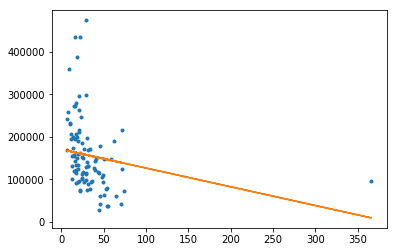

In [16]:
plt.plot(sales['CrimeRate'],sales['HousePrice'],'.',
        sales['CrimeRate'],crime_model.predict(sales['CrimeRate'].values.reshape(-1,1)),'-')
plt.show()

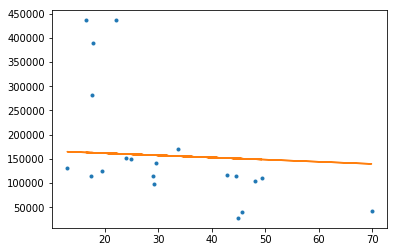

In [17]:
plt.plot(x_test,y_test,'.',
        x_test,y_pred,'-')
plt.show()

Above: dots are original data, line (predicted) is the fit from the simple regression.

# Remove Center City and redo the analysis

Center City is the one observation with an extremely high crime rate, yet house prices are not very low.  This point does not follow the trend of the rest of the data very well.  A question is how much including Center City is influencing our fit on the other datapoints.  Let's remove this datapoint and see what happens.

In [18]:
sales_noCC = sales[sales['MilesPhila'] != 0.0] 

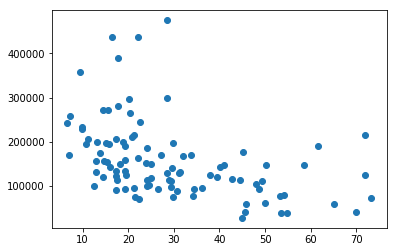

In [19]:
plt.scatter( x=sales_noCC["CrimeRate"], y=sales_noCC["HousePrice"])
plt.show()

### Refit our simple regression model on this modified dataset:

In [20]:
target_noCC = sales_noCC['HousePrice']
features_noCC = sales_noCC['CrimeRate']

x_train, x_test, y_train, y_test = train_test_split(features_noCC,target_noCC, test_size = 0.20, random_state=2)

crime_noCC_model = LinearRegression()
crime_noCC_model.fit(x_train.values.reshape(-1,1),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

This plot is of new model which is trained and tested on data after removing the house with high price

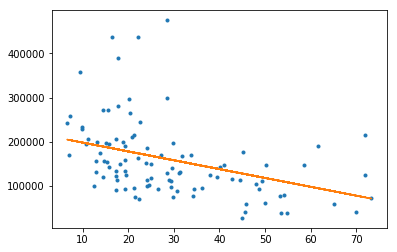

In [21]:
plt.plot(sales_noCC['CrimeRate'],sales_noCC['HousePrice'],'.',
        sales_noCC['CrimeRate'],crime_noCC_model.predict(sales_noCC['CrimeRate'].values.reshape(-1,1)),'-')
plt.show()

# Look at the fit on data after removing the house:

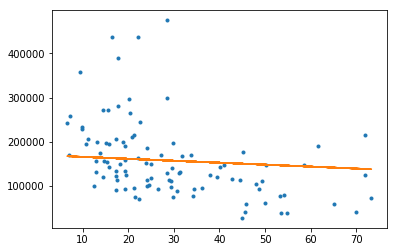

In [22]:
plt.plot(sales_noCC['CrimeRate'],sales_noCC['HousePrice'],'.',
        sales_noCC['CrimeRate'],crime_model.predict(sales_noCC['CrimeRate'].values.reshape(-1,1)),'-')
plt.show()

# Compare coefficients for full-data fit versus no-Center-City fit

Visually, the fit seems different, but let's quantify this by examining the estimated coefficients of our original fit and that of the modified dataset with Center City removed.

In [23]:
print(crime_model.coef_)

[-441.71052831]


In [24]:
print(crime_noCC_model.coef_)

[-2002.58015335]


Above: We see that for the "no Center City" version, per unit increase in crime, the predicted decrease in house prices is 2002.  In contrast, for the original dataset, the drop is only 441 per unit increase in crime.  This is significantly different!

###High leverage points: 
Center City is said to be a "high leverage" point because it is at an extreme x value where there are not other observations.  As a result, recalling the closed-form solution for simple regression, this point has the *potential* to dramatically change the least squares line since the center of x mass is heavily influenced by this one point and the least squares line will try to fit close to that outlying (in x) point.  If a high leverage point follows the trend of the other data, this might not have much effect.  On the other hand, if this point somehow differs, it can be strongly influential in the resulting fit.

###Influential observations:  
An influential observation is one where the removal of the point significantly changes the fit.  As discussed above, high leverage points are good candidates for being influential observations, but need not be.  Other observations that are *not* leverage points can also be influential observations (e.g., strongly outlying in y even if x is a typical value).